In [1]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
firefox = webdriver.Firefox(executable_path='/opt/geckodriver')
firefox.get('https://aluno.sebsa.com.br/loginSalvador.aspx')
form1 = firefox.find_element_by_id('form1')
txtUsuario = firefox.find_element_by_id('txtUsuario')
txtUsuario.send_keys('ALTB354079')
txtSenha = firefox.find_element_by_id('txtSenha')
txtSenha.send_keys('8c66327-')
firefox.find_element_by_id('btnLogin').click()

firefox.get('https://aluno.sebsa.com.br/DualAccess.aspx')
dentro = firefox.find_element_by_class_name('BotaoLogin').get_attribute("href")
firefox.get(dentro)
firefox.get('https://aluno.sebsa.com.br/Aluno/NotasFaltasOcorrencias.aspx')

bimestre = Select(firefox.find_element_by_id('ddlSemestre'))
for el in bimestre.options:
    print(el.text)

bimestre.select_by_index(1)

Todos
1º bimestre
2º bimestre
3º bimestre
4º bimestre


In [3]:
pagina=BeautifulSoup(firefox.page_source, 'lxml')

In [4]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df_ocorrencias = pd.DataFrame()

In [5]:
disciplinas = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbDisciplina_]")]
avaliacoes = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbProva_]")]
notas = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbNota_]")]

df1['disciplina'] = disciplinas
df1['avaliacao'] = avaliacoes
df1['notas'] = notas

In [6]:
bimestre = Select(firefox.find_element_by_id('ddlSemestre'))
bimestre.select_by_index(2)
pagina=BeautifulSoup(firefox.page_source, 'lxml')

disciplinas = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbDisciplina_]")]
avaliacoes = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbProva_]")]
notas = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbNota_]")]

df2['disciplina'] = disciplinas
df2['avaliacao'] = avaliacoes
df2['notas'] = notas

In [7]:
bimestre = Select(firefox.find_element_by_id('ddlSemestre'))
bimestre.select_by_index(3)
pagina=BeautifulSoup(firefox.page_source, 'lxml')

disciplinas = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbDisciplina_]")]
avaliacoes = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbProva_]")]
notas = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbNota_]")]

df3['disciplina'] = disciplinas
df3['avaliacao'] = avaliacoes
df3['notas'] = notas

In [8]:
bimestre = Select(firefox.find_element_by_id('ddlSemestre'))
bimestre.select_by_index(4)
pagina=BeautifulSoup(firefox.page_source, 'lxml')

disciplinas = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbDisciplina_]")]
avaliacoes = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbProva_]")]
notas = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptNotasBimestral_lbNota_]")]

df4['disciplina'] = disciplinas
df4['avaliacao'] = avaliacoes
df4['notas'] = notas

In [9]:
df1.notas = df1.notas.apply(lambda x: pd.to_numeric(x.replace(',','.')))
df2.notas = df2.notas.apply(lambda x: pd.to_numeric(x.replace(',','.')))
df3.notas = df3.notas.apply(lambda x: pd.to_numeric(x.replace(',','.')))
df4.notas = df4.notas.apply(lambda x: pd.to_numeric(x.replace(',','.')))

In [10]:
data_ocorrencia = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptOcorrencias_lbData_]")]
descricao_ocorrencia = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptOcorrencias_lbDescricao_]")]
observacao_ocorrencia = [ elemento.text.strip() for elemento in pagina.select("span[id*=rptOcorrencias_lbObs_]")]


In [11]:
df_ocorrencias['data'] = data_ocorrencia
df_ocorrencias['descricao'] = descricao_ocorrencia
df_ocorrencias['obs'] = observacao_ocorrencia

In [12]:
df_ocorrencias

,data,descricao,obs
0,06/11/2019 00:00:00,LingEst - Sem Tarefa,Nenhuma
1,05/11/2019 00:00:00,Sem tarefa - Língua Portuguesa,Nenhuma
2,02/10/2019 00:00:00,LingEst - Sem Tarefa,Nenhuma
3,30/09/2019 00:00:00,LingEst - Sem Tarefa,Nenhuma
4,25/09/2019 00:00:00,LingEst - Sem Tarefa,Nenhuma
5,02/09/2019 00:00:00,Sem tarefa - Língua Portuguesa,Nenhuma
6,02/09/2019 00:00:00,Sem tarefa de Hist. e Geo.,Nenhuma
7,30/08/2019 00:00:00,Sem tarefa - Matemática,Nenhuma
8,26/08/2019 00:00:00,Sem tarefa de Hist. e Geo.,Nenhuma
9,19/08/2019 00:00:00,Sem tarefa - Língua Portuguesa,Nenhuma


In [13]:
dados1 = df1[df1.avaliacao.apply(lambda x: x.startswith('AT'))].groupby('disciplina').sum()
dados2 = df2[df2.avaliacao.apply(lambda x: x.startswith('AT'))].groupby('disciplina').sum()
dados3 = df3[df3.avaliacao.apply(lambda x: x.startswith('AT'))].groupby('disciplina').sum()
dados4 = df4[df4.avaliacao.apply(lambda x: x.startswith('AT'))].groupby('disciplina').sum()

x = dados1.index

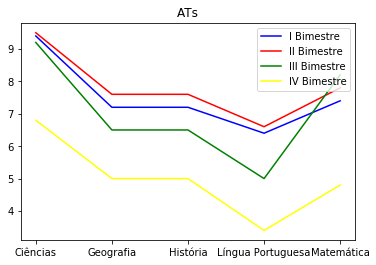

In [14]:
plt.close()
plt.plot(x,dados1.notas, color = 'blue',  label='I Bimestre')
plt.plot(x,dados2.notas, color = 'red', label='II Bimestre')
plt.plot(x,dados3.notas, color = 'green', label='III Bimestre')
plt.plot(x,dados4.notas, color = 'yellow', label='IV Bimestre')
plt.title('ATs')
plt.legend(loc='upper right')


In [15]:
df_at = dados1.join(dados2,lsuffix='_AT_B1', rsuffix='_AT_B2').join(dados3,lsuffix='_AT_B2', rsuffix='_AT_B3').join(dados4,lsuffix='_AT_B3', rsuffix='_AT_B4')
df_at

,notas_AT_B1,notas_AT_B2,notas_AT_B3,notas_AT_B4
disciplina,,,,
Ciências,9.4,9.5,9.2,6.8
Geografia,7.2,7.6,6.5,5.0
História,7.2,7.6,6.5,5.0
Língua Portuguesa,6.4,6.6,5.0,3.4
Matemática,7.4,7.8,8.2,4.8


In [16]:
dados1 = df1[df1.avaliacao.apply(lambda x: x.startswith('AI'))].groupby('disciplina').sum()
dados2 = df2[df2.avaliacao.apply(lambda x: x.startswith('AI'))].groupby('disciplina').sum()
dados3 = df3[df3.avaliacao.apply(lambda x: x.startswith('AI'))].groupby('disciplina').sum()
dados4 = df4[df4.avaliacao.apply(lambda x: x.startswith('AI'))].groupby('disciplina').sum()

df_ai = dados1.join(dados2,lsuffix='_AI_B1_peso_2', rsuffix='_AI_B2_peso_3').join(dados3,lsuffix='_AI_B2_peso_3', rsuffix='_AI_B3').join(dados4,lsuffix='_AI_B3_peso_2', rsuffix='_AI_B4_peso_3')
df_ai

,notas_AI_B1_peso_2,notas_AI_B2_peso_3,notas_AI_B3_peso_2,notas_AI_B4_peso_3
disciplina,,,,
Ciências,14.0,24.6,20.2,15.6
Geografia,14.0,24.6,20.2,15.6
História,14.0,24.6,20.2,15.6
Língua Portuguesa,14.0,24.6,20.2,15.6
Matemática,14.0,24.6,20.2,15.6


In [17]:
dados1 = df1[df1.avaliacao.apply(lambda x: x.startswith('AI'))].groupby('disciplina').sum()
dados2 = df2[df2.avaliacao.apply(lambda x: x.startswith('AI'))].groupby('disciplina').sum()
dados3 = df3[df3.avaliacao.apply(lambda x: x.startswith('AI'))].groupby('disciplina').sum()
dados4 = df4[df4.avaliacao.apply(lambda x: x.startswith('AI'))].groupby('disciplina').sum()

df_ai = dados1.join(dados2,lsuffix='_AI_B1_peso_2', rsuffix='_AI_B2_peso_3').join(dados3,lsuffix='_AI_B2_peso_3', rsuffix='_AI_B3').join(dados4,lsuffix='_AI_B3_peso_2', rsuffix='_AI_B4_peso_3')
df_ai

,notas_AI_B1_peso_2,notas_AI_B2_peso_3,notas_AI_B3_peso_2,notas_AI_B4_peso_3
disciplina,,,,
Ciências,14.0,24.6,20.2,15.6
Geografia,14.0,24.6,20.2,15.6
História,14.0,24.6,20.2,15.6
Língua Portuguesa,14.0,24.6,20.2,15.6
Matemática,14.0,24.6,20.2,15.6


In [18]:
firefox.quit()